<h1 id="tocheading">Python Graph Samples</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

## - Import libraries

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from xlrd import open_workbook
import datetime as dt
import functools

/Users/lili/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## - Select color theme

### 1) Import color brewer

When importing seaborn, the default color cycle is changed to a set of six colors that evoke the standard matplotlib color cycle while aiming to be a bit more pleasing to look at.

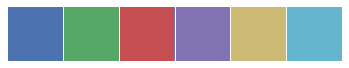

In [3]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

There are already designed color brewers online. One popular color brewer for maps is "ColorBrewer: Color Advice for Maps" at colorbrewer2.org (http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3). colorbrewer2.org has 3 map types: sequential, diverging, and qualitative. Each color map has between 3 and 12 defined colors.

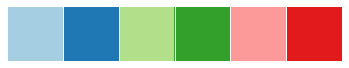

In [4]:
sns.palplot(sns.color_palette("Paired"))

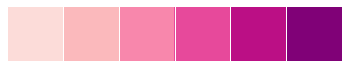

In [5]:
sns.palplot(sns.color_palette("RdPu"))

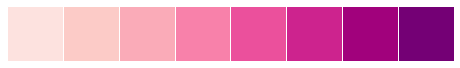

In [6]:
sns.palplot(sns.color_palette("RdPu",8))

To get the hex code of the RGB colors:

In [7]:
pal = sns.color_palette("RdPu",8)
pal.as_hex()

['#fde3e0',
 '#fcccc7',
 '#fbacb9',
 '#f881aa',
 '#eb509c',
 '#cd238f',
 '#a1017c',
 '#740175']

For more seaborn functions, please visit https://seaborn.pydata.org/tutorial/color_palettes.html

<span style="color:blue">**My Theme Color**</span>

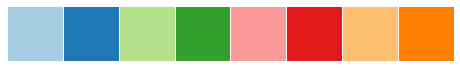

In [8]:
sns.palplot(sns.color_palette("Paired",8))

In [9]:
my_color = sns.color_palette("Paired",7)

### 2) Select your own color palette
#### Use xkco_rgb dictionary to pull out single colors

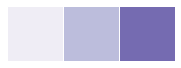

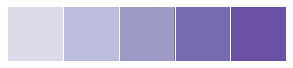

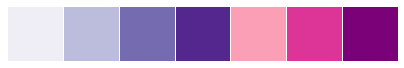

In [10]:
# set color palette names 
newcolors1 = ["#efedf5",'#bcbddc','#756bb1']
newcolors2 = ["#dadaeb","#bcbddc","#9e9ac8",'#756bb1','#6a51a3']
newcolors3 = ["#efedf5",'#bcbddc','#756bb1','#54278f',"#FA9FB5","#DD3497",'#7A0177']

# display color palettes
sns.palplot(newcolors1)
sns.palplot(newcolors2)
sns.palplot(newcolors3)

#### Pass a list of names to the xkcd_palette() function.
See xkcd for the full list of colors and their color names: http://xkcd.com/color/rgb/

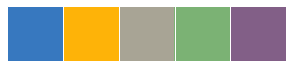

In [11]:
newcolors4 = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(newcolors4))

## - Set graph style

In [12]:
sns.set_style("whitegrid")
sns.set_context("poster")

## - Set font style

In [13]:
#This is to set the font style of the figures
mpl.rc('font',family='Candara')

## - Load data from Excel workbook

### 1) Import a sheet from a workbook

In [14]:
country_data = pd.read_excel("/Users/lili/Documents/Harvard/DB_MPAID/RA_Jeni/Python_training/data/wps_data_enh.xlsx"
                   , sheetname="country", header=None
                   , parse_cols='A:I, O',names=['country','country_code', 'region', 'income_group',
                                                'wps_index','mean_years_edu','financial_inclusion','emp_rate',
                                                'cellphone', 'lifetime_ipv']
                   , skiprows=1)

In [15]:
country_data.head()

,country,country_code,region,income_group,wps_index,mean_years_edu,financial_inclusion,emp_rate,cellphone,lifetime_ipv
0,Afghanistan,AFG,South Asia,Low income,0.384880,4.449483,3.812426,16.100000,52.78885,60.000000
1,Albania,ALB,Europe & Central Asia,Upper middle income,0.713595,10.025110,33.594230,45.400000,85.83062,24.600000
2,Algeria,DZA,Middle East & North Africa,Upper middle income,0.595061,6.740300,40.070960,14.900000,85.24904,13.278551
3,Angola,AGO,Sub-Saharan Africa,Upper middle income,0.575461,2.885254,22.331650,67.099998,44.71910,78.000000
4,Argentina,ARG,Latin America & Caribbean,Upper middle income,0.715061,7.416784,50.852360,49.300000,82.60105,32.688641


### 2) if you want to import multiple sheets from a workbook

In [16]:
alldata = pd.ExcelFile("/Users/lili/Documents/Harvard/DB_MPAID/RA_Jeni/Python_training/data/wps_data_enh.xlsx")
alldata.sheet_names

['country',
 'region',
 'regional_stats',
 'female_labor_force',
 'male_labor_force',
 'legislation']

In [17]:
country_data = alldata.parse("country")
country_data.head()

,country,country_code,region,income_group,wps_index,mean_years_edu,financial_inclusion,emp_rate,cellphone,parliment,legal_discrimination,sex_ratio,unacceptable_work,comm_safety,lifetime_ipv,organized_violence
0,Afghanistan,AFG,South Asia,Low income,0.384880,4.449483,3.812426,16.100000,52.78885,28.391167,45.0,1.060,51.000000,35.45817,60.000000,30.916000
1,Albania,ALB,Europe & Central Asia,Upper middle income,0.713595,10.025110,33.594230,45.400000,85.83062,22.857143,17.0,1.078,6.000000,55.70033,24.600000,0.000000
2,Algeria,DZA,Middle East & North Africa,Upper middle income,0.595061,6.740300,40.070960,14.900000,85.24904,25.785124,34.0,1.050,45.000000,40.86242,13.278551,0.519445
3,Angola,AGO,Sub-Saharan Africa,Upper middle income,0.575461,2.885254,22.331650,67.099998,44.71910,38.181818,25.0,1.030,15.600955,39.77528,78.000000,0.002843
4,Argentina,ARG,Latin America & Caribbean,Upper middle income,0.715061,7.416784,50.852360,49.300000,82.60105,39.513678,14.0,1.040,10.000000,30.93146,32.688641,0.000000


In [18]:
country_data = country_data.iloc[:,[0,2,3,4,5,6,7,8,14]]
country_data.head()

,country,region,income_group,wps_index,mean_years_edu,financial_inclusion,emp_rate,cellphone,lifetime_ipv
0,Afghanistan,South Asia,Low income,0.384880,4.449483,3.812426,16.100000,52.78885,60.000000
1,Albania,Europe & Central Asia,Upper middle income,0.713595,10.025110,33.594230,45.400000,85.83062,24.600000
2,Algeria,Middle East & North Africa,Upper middle income,0.595061,6.740300,40.070960,14.900000,85.24904,13.278551
3,Angola,Sub-Saharan Africa,Upper middle income,0.575461,2.885254,22.331650,67.099998,44.71910,78.000000
4,Argentina,Latin America & Caribbean,Upper middle income,0.715061,7.416784,50.852360,49.300000,82.60105,32.688641


In [19]:
region_data = alldata.parse("region")
region_data = region_data.iloc[:,[0,1,2,3,4,5,11]]
region_data

,country,wps_index,mean_years_edu,financial_inclusion,emp_rate,cellphone,lifetime_ipv
0,Central and Eastern Europe and Central Asia,0.721161,9.106314,58.910937,52.481074,89.673020,20.7667
1,Developed Regions,0.819477,9.944822,95.544835,51.955871,90.531837,25.1616
2,East Asia and the Pacific,0.723006,7.146155,65.483817,62.014177,84.187301,29.793
3,Latin America and the Caribbean,0.684663,7.416784,47.463902,52.326523,74.811957,..
4,Middle East and North Africa,0.574251,5.439056,23.132846,20.286030,80.151977,..
5,South Asia,0.634623,4.449483,39.204092,31.524640,67.085527,37.2509
6,Sub-Saharan Africa,0.621820,2.885254,23.252896,63.263638,63.459144,31.0267
7,Fragile States,0.563000,5.100000,9.638035,25.962720,55.975281,28.2256
8,Global,0.662469,6.760384,55.519335,50.314429,78.368032,30.2583


## - Make graphs

### 1) Scatter Plots

- function: scatter https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html
    * scatter(x, y, s=, c=, marker=, alpha=, linewidths=, edgecolors=None,**kwargs) 
- function: legned https://matplotlib.org/users/legend_guide.html
    * legend(handels, labels, bbox_to_anchor=(x,y), ncol=, borderaxespad=,handletextpad=)
- marker types: http://matplotlib.org/api/markers_api.html?highlight=marker
    * ".": point
    * ",": pixel
    * "o": circle
    * "v": triangle_down
    * "^": triangle_up
- color names:
    * b: blue
    * g: green
    * r: red
    * c: cyan
    * m: magenta
    * y: yellow
    * k: black
    * w: white

In [20]:
np.corrcoef(country_data.wps_index,country_data.lifetime_ipv)

array([[ 1.        , -0.43203838],
       [-0.43203838,  1.        ]])

In [21]:
country_data.region.unique()

array(['South Asia', 'Europe & Central Asia', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'Latin America & Caribbean',
       'East Asia & Pacific', 'North America'], dtype=object)

#### Scatter Plots: All countries

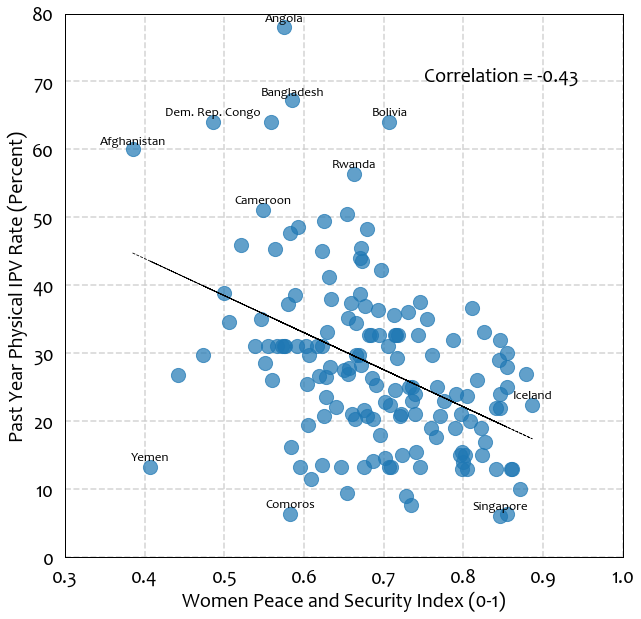

In [22]:
#### Create lables ####
labels = ['Sub-Saharan Africa', 'Middle East & North Africa',
          'Europe & Central Asia', 'South Asia', 'East Asia & Pacific',
          'Latin America & Caribbean', 'North America']

##### Inital Set-up ####
fig, ax1 = plt.subplots(figsize = (10,10))
# axis value
x1 = country_data.wps_index
y1 = country_data.lifetime_ipv
# axis range
ax1.set_xlim(0.3,1)
ax1.set_ylim(0,80)
# color opacity
opacity = 0.7

##### Scatters Plots #####
ax1.scatter(x1 ,y1, s=200, marker="o", color=my_color[1], alpha=opacity, linewidths=1, edgecolor=None)

##### Fit with correlation line (Optional) #####
fit = np.polyfit(x1, y1, deg=1)
ax1.plot(x1, fit[0] * x1 + fit[1], color="k", linewidth=0.8, linestyle="--")

##### Title and labels #####
#ax1.set_title('Women Pease and Security Index and Lifetime IPV Rate, 2016', fontsize=24,color='k')
ax1.set_ylabel("Past Year Physical IPV Rate (Percent)",fontsize=20,color="black")
ax1.set_xlabel("Women Peace and Security Index (0-1)",fontsize=20,color="black")

##### Colorcode the tick tabs #####
ax1.tick_params(axis='x', colors='k',labelsize=20)
ax1.tick_params(axis='y', colors='k',labelsize=20)

##### Colorcode the spine of the graph #####
ax1.spines['bottom'].set_color('k')
ax1.spines['top'].set_color('k')
ax1.spines['left'].set_color('k')
ax1.spines['right'].set_color('k')
    
##### Add country labels #####
selected_ctry = ['Afghanistan','Dem. Rep. Congo','Bolivia','Bangladesh','Iceland','Angola','Cameroon',
                 'Rwanda','Comoros','Singapore', 'Yemen']
#                  ,'Kenya','Mali','Liberia',
#                  'Gabon', 'Uganda','India','Israel', 'Moldova',
#                  'Peru','Haiti','Nepal','Ecuador','Nigeria',
#                  'Albania','Korea','Vietnam','Mexico','Estonia',
#                  'Paraguay','United States','Japan',
#                  'Egypt', 'Pakistan','Yemen']

for ctry in selected_ctry:
     ax1.text(country_data['wps_index'][country_data.country == ctry], 
              country_data["lifetime_ipv"][country_data.country == ctry]+0.5,
              ctry,ha='center', va='bottom',color='k',fontsize=13,zorder=6)
    
##### Source text #####
#ax1.text(0.3,-14,"Source: UN Women.", color="k",fontsize=18)
ax1.text(0.75, 70, 'Correlation = -0.43', color='k', fontsize=20)

# Show the plot/image  
ax1.grid(alpha=0.8,linestyle='--')
ax1.xaxis.grid(True)
ax1.yaxis.grid(True)
plt.savefig("/Users/lili/Documents/Harvard/DB_MPAID/RA_Jeni/Python_training/graphs/figure_wps_a.jpg",
            bbox_inches='tight')
plt.show();

#### Scatter Plots: All countries by region

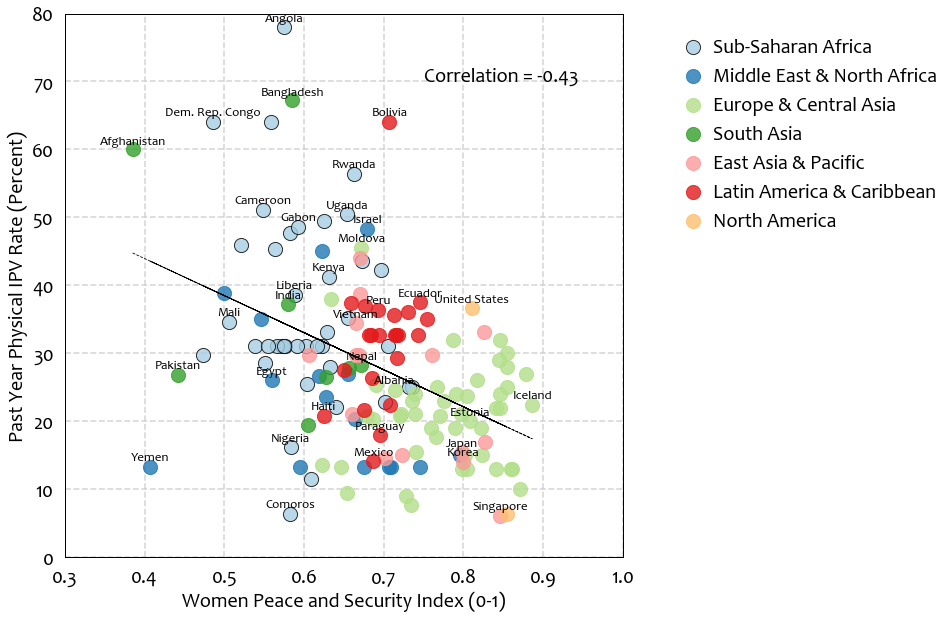

In [23]:
#### Create lables ####
labels = ['Sub-Saharan Africa', 'Middle East & North Africa',
          'Europe & Central Asia', 'South Asia', 'East Asia & Pacific',
          'Latin America & Caribbean', 'North America']

##### Inital Set-up ####
fig, ax1 = plt.subplots(figsize = (10,10))
# axis value
x1 = country_data.wps_index
y1 = country_data.lifetime_ipv
# axis range
ax1.set_xlim(0.3,1)
ax1.set_ylim(0,80)
# color opacity
opacity = 0.8

##### Scatters Plots #####
group1 = ax1.scatter(x1[country_data.region=="Sub-Saharan Africa"],      
                     y1[country_data.region=="Sub-Saharan Africa"],      
                     s=200, marker="o", color=my_color[0], alpha=opacity, linewidths=1, edgecolor='k')

group2 = ax1.scatter(x1[country_data.region=="Middle East & North Africa"],
                     y1[country_data.region=="Middle East & North Africa"],
                     s=200, marker="o", color=my_color[1], alpha=opacity, linewidths=1)

group3 = ax1.scatter(x1[country_data.region=="Europe & Central Asia"],     
                     y1[country_data.region=="Europe & Central Asia"],     
                     s=200, marker="o", color=my_color[2], alpha=opacity, linewidths=1)

group4 = ax1.scatter(x1[country_data.region=="South Asia"],               
                     y1[country_data.region=="South Asia"],               
                     s=200, marker="o", color=my_color[3], alpha=opacity, linewidths=1)

group5 = ax1.scatter(x1[country_data.region=="East Asia & Pacific"],       
                     y1[country_data.region=="East Asia & Pacific"],      
                     s=200, marker='o', color=my_color[4], alpha=opacity, linewidths=1)

group6 = ax1.scatter(x1[country_data.region=="Latin America & Caribbean"],
                     y1[country_data.region=="Latin America & Caribbean"],
                     s=200, marker='o', color=my_color[5], alpha=opacity, linewidths=1)

group7 = ax1.scatter(x1[country_data.region=="North America"],           
                     y1[country_data.region=="North America"],
                     s=200, marker='o', color=my_color[6], alpha=opacity, linewidths=1)

##### Fit with correlation line (Optional) #####
fit = np.polyfit(x1, y1, deg=1)
ax1.plot(x1, fit[0] * x1 + fit[1], color="k", linewidth=0.8, linestyle="--")

##### Title and labels #####
#ax1.set_title('Women Pease and Security Index and Lifetime IPV Rate, 2016', fontsize=24,color='k')
ax1.set_ylabel("Past Year Physical IPV Rate (Percent)",fontsize=20,color="black")
ax1.set_xlabel("Women Peace and Security Index (0-1)",fontsize=20,color="black")

##### Colorcode the tick tabs #####
ax1.tick_params(axis='x', colors='k',labelsize=20)
ax1.tick_params(axis='y', colors='k',labelsize=20)

##### Colorcode the spine of the graph #####
ax1.spines['bottom'].set_color('k')
ax1.spines['top'].set_color('k')
ax1.spines['left'].set_color('k')
ax1.spines['right'].set_color('k')

##### Legend #####
leg1=ax1.legend((group1,group2,group3,group4,group5,group6,group7),labels,
                loc='upper right',fontsize=20,bbox_to_anchor=(1.9,1.3),ncol=1, borderaxespad=9,handletextpad=0)
for text in leg1.get_texts():
    plt.setp(text,color='k')
    
##### Add country labels #####
selected_ctry = ['Kenya','Rwanda','Mali','Liberia','Cameroon','Angola',
                 'Gabon', 'Uganda','India','Israel', 'Moldova',
                 'Peru','Haiti','Nepal','Ecuador','Comoros','Nigeria',
                 'Albania','Korea','Vietnam','Mexico','Estonia',
                 'Singapore','Dem. Rep. Congo','Paraguay','Bolivia','United States','Japan','Iceland',
                 'Egypt','Bangladesh', 'Pakistan','Afghanistan','Yemen']

for ctry in selected_ctry:
     ax1.text(country_data['wps_index'][country_data.country == ctry], 
              country_data["lifetime_ipv"][country_data.country == ctry]+0.5,
              ctry,ha='center', va='bottom',color='k',fontsize=13,zorder=10)
    
##### Source text #####
#ax1.text(0.3,-14,"Source: UN Women.", color="k",fontsize=18)
ax1.text(0.75, 70, 'Correlation = -0.43', color='k', fontsize=20)

# Show the plot/image  
ax1.grid(alpha=0.8,linestyle='--')
ax1.xaxis.grid(True)
ax1.yaxis.grid(True)
plt.savefig("/Users/lili/Documents/Harvard/DB_MPAID/RA_Jeni/Python_training/graphs/figure_wps_b.jpg",
            bbox_inches='tight')
plt.show();

### 2) Bar Charts

- bar charts: https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html
    * bar(x, height, width, alpha=, color=, opacity=, label='', align='center', **kwargs)
- vertial lines https://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.vlines.html
    * vlines(x, ymin, ymax, colors=, linestyles=, label='', **kwargs)¶
- linestyles: https://matplotlib.org/examples/lines_bars_and_markers/line_styles_reference.html
    * "solid"
    * "dotted"
    * "--"
    * "-."

#### Scatter Plots: Simple Bart Chart

In [24]:
# get the data
legislation = alldata.parse("legislation")
legislation.head()

,year,value
0,1976,1
1,1984,2
2,1989,3
3,1993,4
4,1994,8


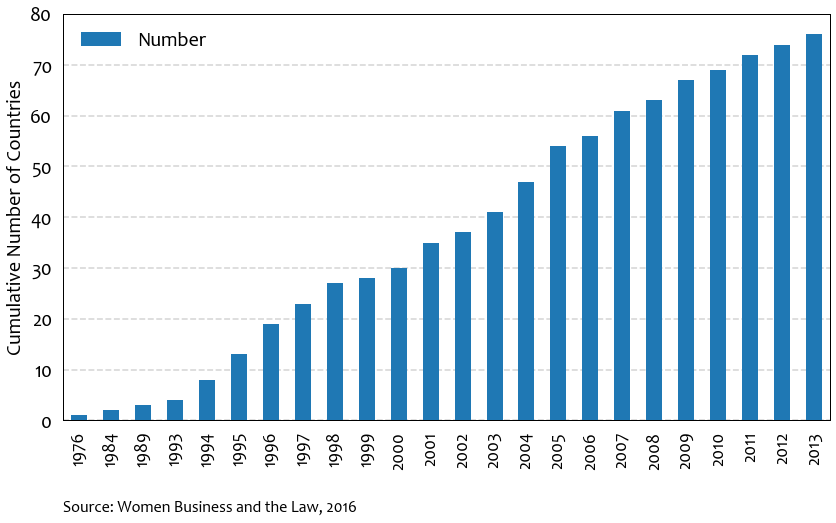

In [25]:
##### Initial setup ####
# lables and y-values
n_groups = 24
labels = legislation['year']
value = legislation['value']

fig, ax = plt.subplots(figsize=(12,7))
index = np.arange(n_groups)
opacity = 1
ax.set_ylim(0,80)
bar_width = 0.5

##### Bars #####
plt.bar(index, value, bar_width, alpha=opacity, color=my_color[1], label='Number', zorder=1)

##### Lables, titles and legneds #####
#plt.xlabel('Year',fontsize=20,color="k")
plt.ylabel('Cumulative Number of Countries',fontsize=20,color="k")
leg1 = plt.legend(loc="upper left", fontsize=20, ncol=1)
for text in leg1.get_texts():
    plt.setp(text,color='k')

##### Colorcode the tick tabs ####
ax.tick_params(axis='x', colors='k', labelsize=18)
ax.tick_params(axis='y', colors='k', labelsize=20)
plt.xticks(index, (labels), ha="center")
plt.xticks(rotation=90)

#### Colorcode the spine of the graph ####
ax.spines['bottom'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_color('k')
ax.spines['right'].set_color('k')

#### Other texts ####
ax.text(-0.5,-18,'Source: Women Business and the Law, 2016',fontsize=16,color="k")

# Show the plot/image
plt.tight_layout()
plt.grid(alpha=0.8,linestyle='--')
ax.xaxis.grid(False)
plt.margins(0.01,0.02)
plt.savefig("/Users/lili/Documents/Harvard/DB_MPAID/RA_Jeni/Python_training/graphs/figure_law.jpg"
            ,bbox_inches='tight')
plt.show();

#### Scatter Plots: Bart Chart with Vertical Lines

In [26]:
# get the data
regional_stats = alldata.parse("regional_stats")
regional_stats

,country,ipv_12mon,max_min,region
0,NaN,24.076190,avg,Sub-Saharan Africa
1,NaN,20.380000,avg,South Asia
2,NaN,14.716667,avg,East Asia & Pacific
3,NaN,11.550000,avg,Middle East & North Africa
4,NaN,9.469231,avg,Latin America & Caribbean
5,NaN,5.305556,avg,Europe & Central Asia
6,NaN,2.650000,avg,North America
7,Equatorial Guinea,40.200000,max,Sub-Saharan Africa
8,Israel,23.300000,max,Middle East & North Africa
9,Kyrgyz Republic,16.900000,max,Europe & Central Asia


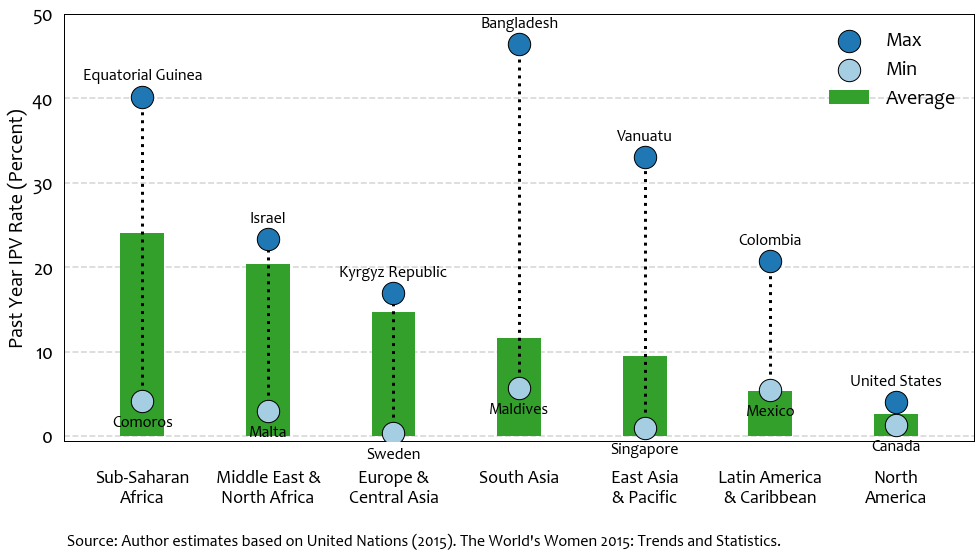

In [27]:
#### Create lables ####
labels = ['Sub-Saharan\nAfrica', 'Middle East &\nNorth Africa',
          'Europe &\nCentral Asia', 'South Asia', 'East Asia\n& Pacific',
          'Latin America\n& Caribbean','North\nAmerica']

##### Initial setup ####
# x-axis value: Create group counts
n_groups = 7
# y-axis value
y_avg = regional_stats["ipv_12mon"][regional_stats.max_min == "avg"]
y_min = regional_stats["ipv_12mon"][regional_stats.max_min == "min"]
y_max = regional_stats["ipv_12mon"][regional_stats.max_min == "max"]
# general setups
fig, ax = plt.subplots(figsize=(14,7))
index = np.arange(n_groups)
opacity = 1
ax.set_ylim(-0.6,50)
bar_width = 0.35

#### Bars, scatters, and lines ####
bar1 = plt.bar(index, y_avg, bar_width, alpha=opacity, color=my_color[3], label='Average', zorder=1)

lines = plt.vlines(index, y_min,y_max, linewidth=3, linestyle="dotted", zorder=2)

scatter1 = plt.scatter(index, y_max, marker="o", 
                       s=500, alpha=opacity, color=my_color[1], label='Max', zorder=3, edgecolor="k", linewidth=1)

scatter2 = plt.scatter(index, y_min, marker="o", 
                       s=500, alpha=opacity, color=my_color[0], label='Min', zorder=3, edgecolor="k", linewidth=1)


#### Lables and titles ####
#plt.xlabel('Region',fontsize=20,color="k")
plt.ylabel('Past Year IPV Rate (Percent)',fontsize=20,color="k")
#plt.xticks(index, (labels), ha="center")

for i,txt in enumerate(labels):
    ax.text(index[i], -4, txt, 
            ha='center', va='top',color='k',fontsize=18, zorder=6)

#### Legends ####
leg1 = plt.legend(loc="upper right", fontsize=20, ncol=1)
for text in leg1.get_texts():
    plt.setp(text,color='k')

#### Label country outliers ####
for i,x in enumerate(y_max):
    ax.text(i, x+1.5, regional_stats[regional_stats.max_min == "max"].country[i+7], 
            ha='center', va='bottom',color='k',fontsize=16)

for i,x in enumerate(y_min):
    ax.text(i, x-3.5, regional_stats[regional_stats.max_min == "min"].country[i+14], 
            ha='center', va='bottom',color='k',fontsize=16)

#### Other texts #####
ax.text(-0.6,-13,"Source: Author estimates based on United Nations (2015). The World's Women 2015: Trends and Statistics.",fontsize=16,color="k")

#### Colorcode the tick tabs ####
ax.tick_params(axis='x', colors='w',labelsize=18)
ax.tick_params(axis='y', colors='k',labelsize=20)

##### Colorcode the spine of the graph #####
ax.spines['bottom'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_color('k')
ax.spines['right'].set_color('k')

##### Show the plot/image #####
plt.tight_layout()
plt.grid(alpha=0.8,linestyle='--')
ax.xaxis.grid(False)
plt.margins(0.07,0.02)
plt.savefig("/Users/lili/Documents/Harvard/DB_MPAID/RA_Jeni/Python_training/graphs/figure_ipv.jpg",
            bbox_inches='tight')
plt.show();

 ### 3) Line Charts

- line charts: https://matplotlib.org/users/pyplot_tutorial.html
    * plot(x, y, alpha=, color=, opacity=, label='', **kwargs)
- linestyles: https://matplotlib.org/examples/lines_bars_and_markers/line_styles_reference.html
    * "solid"
    * "dotted"
    * "--"
    * "-."

In [28]:
# get the data
mlfp = alldata.parse("male_labor_force")
flfp = alldata.parse("female_labor_force")
mlfp.head()

,MLFPR15,Central and Eastern Europe and Central Asia,Developed Regions,East Asia and the Pacific,Latin America and the Caribbean,Middle East and North Africa,South Asia,Sub-Saharan Africa,World
0,1990,73.634573,72.877828,84.081453,82.433152,76.158120,85.115747,79.689972,80.637147
1,1991,73.110990,72.748029,84.072742,82.613091,76.182365,84.886166,79.410829,80.531639
2,1992,72.526367,72.293427,84.076667,82.856492,75.276087,84.655071,79.110928,80.341886
3,1993,71.515689,71.892473,84.054660,82.867529,75.800602,84.341910,78.800883,80.126881
4,1994,70.637237,71.558924,84.002859,82.709781,76.007643,84.150785,78.570984,79.934872


In [29]:
share1990 = 80.6
share2015 = 76.2

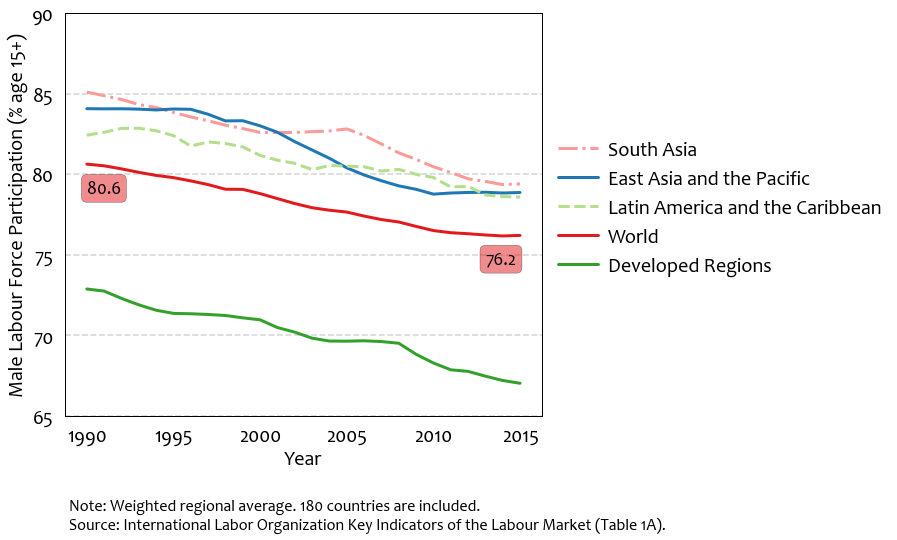

In [30]:
#### Create lables ####
labels = ['South Asia','East Asia and the Pacific','Latin America and the Caribbean','World','Developed Regions']

#### Initial setup ####
fig, ax = plt.subplots(figsize=(8,7))

### Line plots ####
ax.plot(mlfp.MLFPR15, mlfp['South Asia']                     , color=my_color[4], linewidth=3, linestyle="-.")
ax.plot(mlfp.MLFPR15, mlfp['East Asia and the Pacific']      , color=my_color[1], linewidth=3)
ax.plot(mlfp.MLFPR15, mlfp['Latin America and the Caribbean'], color=my_color[2], linewidth=3, linestyle="--")
ax.plot(mlfp.MLFPR15, mlfp['World']                          , color=my_color[5], linewidth=3)
ax.plot(mlfp.MLFPR15, mlfp['Developed Regions']              , color=my_color[3], linewidth=3)

##### Set tick rang ####
ax.set_ylim(65,90)

#### titles and labels ####
#ax.set_title('', color='k', position=(1,1.2),fontsize=22)
ax.set_xlabel('Year', color='k',fontsize=20)
ax.set_ylabel('Male Labour Force Participation (% age 15+)', color='k',fontsize=20)

#### Legend ####
leg1 = ax.legend(labels,loc='upper right',fontsize=20,bbox_to_anchor=(2.15,1.2), ncol=1, 
                 borderaxespad=10,handletextpad=0.5)
for text in leg1.get_texts():
    plt.setp(text,color='k')

##### Colorcode the tick tabs ####
ax.tick_params(axis='x', colors='k',labelsize=20)
ax.tick_params(axis='y', colors='k',labelsize=20)

#### Colorcode the spine of the graph ####
ax.spines['bottom'].set_color('k')
ax.spines['top'].set_color('k')
ax.spines['left'].set_color('k')
ax.spines['right'].set_color('k')

#### Other texts ####
# Important numbers
ax.annotate(share1990,(1990,share1990-2), va='bottom',color="k",fontsize=18,
            bbox=dict(boxstyle='round', fc=my_color[5], alpha=0.5))

ax.annotate(share2015,(2013,share2015-2), va='bottom',color="k",fontsize=18,
            bbox=dict(boxstyle='round', fc=my_color[5], alpha=0.5))
# Source
ax.text(1989,58,'Note: Weighted regional average. 180 countries are included.\nSource: International Labor Organization Key Indicators of the Labour Market (Table 1A).',fontsize=16,color="k")

# Show the plot/image
plt.tight_layout()
plt.grid(alpha=0.8,linestyle='--')
ax.xaxis.grid(False)
plt.savefig("/Users/lili/Documents/Harvard/DB_MPAID/RA_Jeni/Python_training/graphs/figure_mlf.jpg",
            bbox_inches='tight')
plt.show();

### 4) Two Paralelle Chartes

#### Scatter Plots: Bart Chart with Vertical Lines (Left and Right)

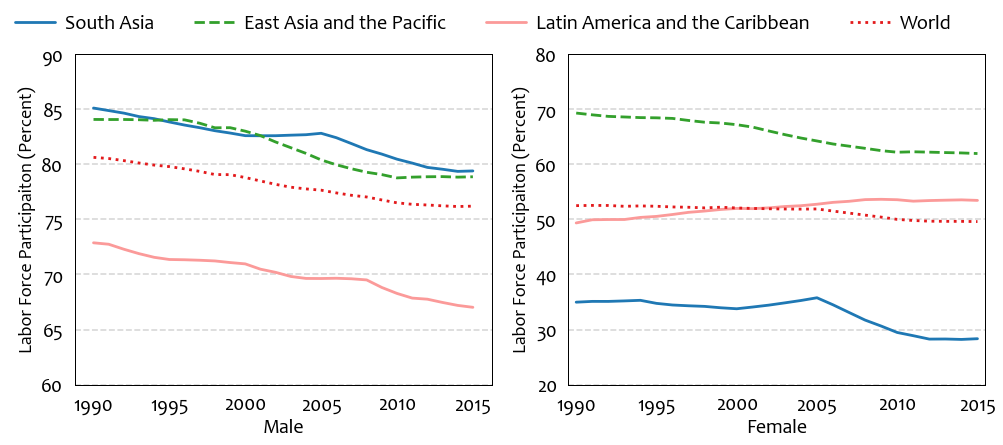

In [31]:
#### Create Labels ####
label_region = ['South Asia','East Asia and the Pacific','Developed Regions','World']
label_sex = ["Female","Male"]

#### Initial setup ####
# Creat group counts
n_groups = 5
# x-values
x1 = mlfp.MLFPR15
x2 = flfp.FLFPR15

fig, (ax1, ax2) = plt.subplots(1,2, sharey=False, figsize=(14,6))
bar_width = 0.5
opacity = 1
index = np.arange(n_groups)

#### Lines ####
# Lines 1
line1a=ax1.plot(x1, mlfp["South Asia"]               , color=my_color[1], alpha=opacity)
line1b=ax1.plot(x1, mlfp["East Asia and the Pacific"], color=my_color[3], alpha=opacity, linestyle="--")
line1c=ax1.plot(x1, mlfp["Developed Regions"]        , color=my_color[4], alpha=opacity)
line1d=ax1.plot(x1, mlfp["World"]                    , color=my_color[5], alpha=opacity, linestyle="dotted")
# Lines 2
line2a=ax2.plot(x2, flfp["South Asia"]               , color=my_color[1], alpha=opacity)
line2b=ax2.plot(x2, flfp["East Asia and the Pacific"], color=my_color[3], alpha=opacity, linestyle="--")
line2c=ax2.plot(x2, flfp["Developed Regions"]        , color=my_color[4], alpha=opacity)
line2d=ax2.plot(x2, flfp["World"]                    , color=my_color[5], alpha=opacity, linestyle="dotted")

#### y axis max and min ####
ax1.set_ylim(60,90)
ax2.set_ylim(20,80)

#### Lables and ticks ####
ax1.set_ylabel("Labor Force Participaiton (Percent)",fontsize=18,color="k")
ax1.set_xlabel("Male",fontsize=20,color="k")

ax2.set_ylabel("Labor Force Participaiton (Percent)",fontsize=18,color="k")
ax2.set_xlabel("Female",fontsize=20,color="k")

#### Colorcode the tick tabs ####
ax1.tick_params(axis='x', colors='k',labelsize=20)
ax1.tick_params(axis='y', colors='k',labelsize=20)
ax2.tick_params(axis='x', colors='k',labelsize=20)
ax2.tick_params(axis='y', colors='k',labelsize=20)

#### Legend ####
leg1 = ax1.legend(labels,loc='upper right',fontsize=20,bbox_to_anchor=(2.6,1.75), ncol=4, 
                  borderaxespad=10,handletextpad=0.5)
for text in leg1.get_texts():
    plt.setp(text,color='k')

#### Colorcode the spine of the graph ####
ax1.spines['bottom'].set_color('k')
ax1.spines['top'].set_color('k')
ax1.spines['left'].set_color('k')
ax1.spines['right'].set_color('k')

ax2.spines['bottom'].set_color('k')
ax2.spines['top'].set_color('k')
ax2.spines['left'].set_color('k')
ax2.spines['right'].set_color('k')

#### Show the plot/image ####
ax1.grid(alpha=0.8,linestyle='--')
ax1.xaxis.grid(False)
ax1.yaxis.grid(True)

ax2.grid(alpha=0.8,linestyle='--')
ax2.xaxis.grid(False)
ax2.yaxis.grid(True)

fig.tight_layout()
plt.margins(0.02)
plt.savefig("/Users/lili/Documents/Harvard/DB_MPAID/RA_Jeni/Python_training/graphs/figure_lf_b.jpg",
            bbox_inches='tight')
plt.show();

#### Scatter Plots: Bart Chart with Vertical Lines (Up and Down)

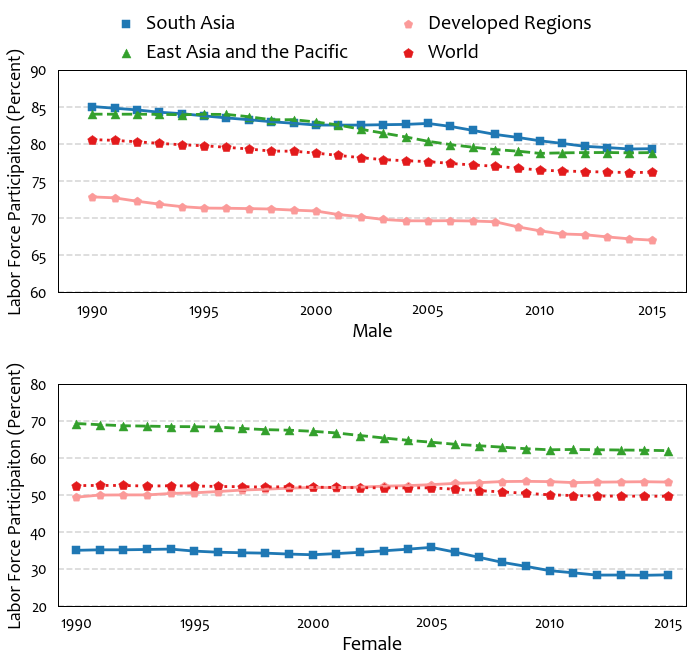

In [32]:
#### Create Labels ####
label_region = labels = ['South Asia','East Asia and the Pacific','Developed Regions','World']
label_sex = ["Female","Male"]

#### Initial setup ####
# Creat group counts
n_groups = 5
# x-values
x1 = mlfp.MLFPR15
x2 = flfp.FLFPR15

fig, (ax1, ax2) = plt.subplots(2,1, sharey=False, figsize=(10,9))
bar_width = 0.5
opacity = 1
index = np.arange(n_groups)

#### Lines ####
# Lines 1
line1a=ax1.plot(x1, mlfp["South Asia"]               , color=my_color[1], alpha=opacity)
line1b=ax1.plot(x1, mlfp["East Asia and the Pacific"], color=my_color[3], alpha=opacity, linestyle="--")
line1c=ax1.plot(x1, mlfp["Developed Regions"]        , color=my_color[4], alpha=opacity)
line1d=ax1.plot(x1, mlfp["World"]                    , color=my_color[5], alpha=opacity, linestyle="dotted")
# Lines 2
line2a=ax2.plot(x2, flfp["South Asia"]               , color=my_color[1], alpha=opacity)
line2b=ax2.plot(x2, flfp["East Asia and the Pacific"], color=my_color[3], alpha=opacity, linestyle="--")
line2c=ax2.plot(x2, flfp["Developed Regions"]        , color=my_color[4], alpha=opacity)
line2d=ax2.plot(x2, flfp["World"]                    , color=my_color[5], alpha=opacity, linestyle="dotted")
# Scatters 1
scatter1a=ax1.scatter(x1, mlfp["South Asia"], 
                      s=80,marker="s",color=my_color[1], alpha=opacity, label="South Asia")
scatter1b=ax1.scatter(x1, mlfp["East Asia and the Pacific"], 
                      s=80,marker="^",color=my_color[3], alpha=opacity, label="East Asia and the Pacific")
scatter1c=ax1.scatter(x1, mlfp["Developed Regions"], 
                      s=80,marker="p",color=my_color[4], alpha=opacity, label="Developed Regions")
scatter1d=ax1.scatter(x1, mlfp["World"], 
                      s=100,marker="p",color=my_color[5], alpha=opacity, label="World")
# Scatters 2
scatter2a=ax2.scatter(x2, flfp["South Asia"], 
                      s=80,marker="s",color=my_color[1], alpha=opacity, label="South Asia")
scatter2b=ax2.scatter(x2, flfp["East Asia and the Pacific"], 
                      s=80,marker="^",color=my_color[3], alpha=opacity, label="East Asia and the Pacific")
scatter2c=ax2.scatter(x2, flfp["Developed Regions"], 
                      s=80,marker="p",color=my_color[4], alpha=opacity, label="Developed Regions")
scatter2d=ax2.scatter(x2, flfp["World"], 
                      s=100,marker="p",color=my_color[5], alpha=opacity, label="World")

#### y axis max and min ####
ax1.set_ylim(60,90)
ax2.set_ylim(20,80)

#### Lables and ticks ####
ax1.set_ylabel("Labor Force Participaiton (Percent)",fontsize=18,color="k")
ax1.set_xlabel("Male",fontsize=20,color="k")

ax2.set_ylabel("Labor Force Participaiton (Percent)",fontsize=18,color="k")
ax2.set_xlabel("Female",fontsize=20,color="k")

ax.tick_params(axis='x', colors='k',labelsize=20)
ax.tick_params(axis='y', colors='k',labelsize=20)

#### Colorcode the tick tabs ####
ax1.tick_params(axis='x', colors='k')
ax1.tick_params(axis='y', colors='k')
ax2.tick_params(axis='x', colors='k')
ax2.tick_params(axis='y', colors='k')

#### Legend ####
leg1=ax1.legend((scatter1a,scatter1b,scatter1c,scatter1d),(label_region),loc='upper right',
                fontsize=20,bbox_to_anchor=(1.15,2.1),ncol=2, borderaxespad=9,handletextpad=0)
for text in leg1.get_texts():
    plt.setp(text,color='black')

#### Colorcode the spine of the graph ####
ax1.spines['bottom'].set_color('k')
ax1.spines['top'].set_color('k')
ax1.spines['left'].set_color('k')
ax1.spines['right'].set_color('k')

ax2.spines['bottom'].set_color('k')
ax2.spines['top'].set_color('k')
ax2.spines['left'].set_color('k')
ax2.spines['right'].set_color('k')

#### Show the plot/image ####
ax1.grid(alpha=0.8,linestyle='--')
ax1.xaxis.grid(False)
ax1.yaxis.grid(True)

ax2.grid(alpha=0.8,linestyle='--')
ax2.xaxis.grid(False)
ax2.yaxis.grid(True)

fig.tight_layout()
plt.margins(0.02)
plt.savefig("/Users/lili/Documents/Harvard/DB_MPAID/RA_Jeni/Python_training/graphs/figure_lf_a.jpg",
            bbox_inches='tight')
plt.show();

## - Markdown tutorials

Example: 
* This _is_ important
* This **is** important
* This is <span style="color:red">red</span>
* This is **<span style="color:blue">blue</span>**


https://www.markdowntutorial.com/